In [243]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint


Load and cleanup the dataset

In [232]:
df = pd.read_csv('data.csv')
df = df.dropna()


df_complete = df[['I consider myself to be a creative person',
       'I would describe my style of creativity as erratic or nonsystematic',
       'I believe in unconscious processes that facilitate my creative work',
       'I have had insights, the sources of which I am unable to explain or understand',
       'I am engaged in creative type work on a regular basis',
       'After reading it, I check important information, even if it \r\nseems to be true',
       'I am willing to share the newly gained information',
       'When I talk, I give many examples',
       'I like to collate different opinions and compare them with each other',
       'I must be emotionally moved in order to be creative',
       'I believe that creativity comes from hard work and persistence',
       'I have to be in the right mood or feeling to do creative work',
       'I typically wait for a flash of inspiration before I begin working',
       'I try to use the information I have learned in everyday life',
       'I pay attention to the contexts, nuances and overtones of the statements',
       'I have difficulties with paraphrasing',
       'To evaluate the information, I check many sources',
       'I do not remember much from what I was learning at school',
       'I physically isolate myself from other people when I am working on creative ideas',
       'Everything already exists, so nothing completely new can be created',
       'I like finding dependencies between seemingly different \r\nphenomena',
       'I think a final product that is not readily observable through the senses can emerge in a creative act',
       'When I have a new idea, I tend to discuss it with someone to determine its potential for success',
       'I usually have a lot of both workable and unworkable ideas',
       'I work most creatively when I have deadlines',
       
       'How would you rate your analytical skills?',
       'How would you rate your technical skills?',
       'How would you rate your organizational skills?',
       'How would you rate your interest in technology?',
       'How would you rate your interest in learning new skills?'
       ]]

df_complete.rename(columns={'How would you rate your analytical skills?': 'How_would_you_rate_your_analytical_skills', 
                            'How would you rate your technical skills?': 'How_would_you_rate_your_technical_skills',
                            'How would you rate your organizational skills?': 'How_would_you_rate_your_organizational_skills',
                            'How would you rate your interest in technology?': 'How_would_you_rate_your_interest_in_technology',
                            'How would you rate your interest in learning new skills?': 'How_would_you_rate_your_interest_in_learning_new_skills',
                            }, 
                            inplace=True)


map_dict2 = {'Agree':0.5, 'Strongly Agree':1, 'Neutral':0, 'Disagree':-0.5, "Strongly Disagree":-1, 'Disgree':-0.5, 'Strongly agree': 1}
df_complete.replace(map_dict2, inplace=True)

map_dict = {"High": 2, "Low":0, "Moderate":1}
df_complete.replace(map_dict, inplace=True)

old_columns = list(df_complete.columns)
new_columns = [col.replace(" ", '_').replace(",", '').replace('\r', '').replace('\n', '').replace('\r\n', '') for col in old_columns]

column_names_to_be_changed = {}
for old, new_col in zip(old_columns, new_columns):
    column_names_to_be_changed[old] = new_col

print(column_names_to_be_changed)

df_complete.rename(columns=column_names_to_be_changed, inplace=True)


{'I consider myself to be a creative person': 'I_consider_myself_to_be_a_creative_person', 'I would describe my style of creativity as erratic or nonsystematic': 'I_would_describe_my_style_of_creativity_as_erratic_or_nonsystematic', 'I believe in unconscious processes that facilitate my creative work': 'I_believe_in_unconscious_processes_that_facilitate_my_creative_work', 'I have had insights, the sources of which I am unable to explain or understand': 'I_have_had_insights_the_sources_of_which_I_am_unable_to_explain_or_understand', 'I am engaged in creative type work on a regular basis': 'I_am_engaged_in_creative_type_work_on_a_regular_basis', 'After reading it, I check important information, even if it \r\nseems to be true': 'After_reading_it_I_check_important_information_even_if_it_seems_to_be_true', 'I am willing to share the newly gained information': 'I_am_willing_to_share_the_newly_gained_information', 'When I talk, I give many examples': 'When_I_talk_I_give_many_examples', 'I li

/var/folders/hs/0l_t8k_j7zq_qlk2g1p18g600000gn/T/ipykernel_21224/1323336742.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete.rename(columns={'How would you rate your analytical skills?': 'How_would_you_rate_your_analytical_skills',
/var/folders/hs/0l_t8k_j7zq_qlk2g1p18g600000gn/T/ipykernel_21224/1323336742.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_complete.replace(map_dict2, inplace=True)
/var/folders/hs/0l_t8k_j7zq_qlk2g1p18g600000gn/T/ipykernel_21224/1323336742.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [233]:
# Separate features and targets
X = df_complete.iloc[:, :25]  # First 25 questions
y = df_complete.iloc[:, 25:]  # Last 5 questions

In [235]:
y_one_hot = np.stack([to_categorical(y.to_numpy()[:, i], num_classes=3) for i in range(y.shape[1])], axis=1)
print(y_one_hot.shape)

(73, 5, 3)


In [238]:
# Normalize/scale the feature data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)

array([[[0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.]],

       [[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.]],

       [[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.]],

       ...,

       [[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.]],

       [[0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]],

       [[0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.]]])

In [239]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, y_one_hot, test_size=0.1, random_state=42)


In [241]:
model = Sequential()
model.add(Dense(3200, activation='relu'))  # Input layer
model.add(Dropout(0.5)) # Dropout Layer
model.add(Dense(128, activation='relu'))  # Hidden layer 1
model.add(Dropout(0.5)) # Dropout Layer
model.add(Dense(128, activation='relu'))  # Hidden layer 2
model.add(Dropout(0.5)) # Dropout Layer
model.add(Dense(128, activation='relu'))  # Hidden layer 3
model.add(Dropout(0.5)) # Dropout Layer
model.add(Dense(15, activation='softmax'))  # Output layer
model.add(tf.keras.layers.Reshape((5, 3))) # Output Layer reshaped

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [244]:
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)


In [245]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=4, validation_split=0.1, callbacks=[checkpoint])


Epoch 1/100
14/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4074 - loss: 1.0882 
Epoch 1: val_accuracy improved from -inf to 0.62500, saving model to best_model.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4224 - loss: 1.0794 - val_accuracy: 0.6250 - val_loss: 0.8719
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5567 - loss: 0.9469
Epoch 2: val_accuracy did not improve from 0.62500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5595 - loss: 0.9437 - val_accuracy: 0.6250 - val_loss: 0.7626
Epoch 3/100
12/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5692 - loss: 0.8959
Epoch 3: val_accuracy improved from 0.62500 to 0.65000, saving model to best_model.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5762 - loss: 0.8971 - val_accuracy: 0.6500 - val_loss: 0.7666
Epoch 4/100
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5838 - loss: 1.0268
Epoch 4: val_accuracy did not improve from 0.65000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1

In [246]:
model.load_weights('best_model.keras')
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 80.00%


In [247]:
# Save the final model
model.save('final_model.h5')

In [248]:
from tensorflow.keras.models import load_model
# Load the saved model
loaded_model = load_model('final_model.h5')

# Evaluate the loaded model to confirm it works
loss, accuracy = loaded_model.evaluate(X_test, y_test, verbose=0)
print(f"Loaded Model Test Accuracy: {accuracy * 100:.2f}%")

Loaded Model Test Accuracy: 80.00%


{'I consider myself to be a creative person': 'I_consider_myself_to_be_a_creative_person', 'I would describe my style of creativity as erratic or nonsystematic': 'I_would_describe_my_style_of_creativity_as_erratic_or_nonsystematic', 'I believe in unconscious processes that facilitate my creative work': 'I_believe_in_unconscious_processes_that_facilitate_my_creative_work', 'I have had insights, the sources of which I am unable to explain or understand': 'I_have_had_insights_the_sources_of_which_I_am_unable_to_explain_or_understand', 'I am engaged in creative type work on a regular basis': 'I_am_engaged_in_creative_type_work_on_a_regular_basis', 'After reading it, I check important information, even if it \r\nseems to be true': 'After_reading_it_I_check_important_information_even_if_it_seems_to_be_true', 'I am willing to share the newly gained information': 'I_am_willing_to_share_the_newly_gained_information', 'When I talk, I give many examples': 'When_I_talk_I_give_many_examples', 'I li

array([1, 0, 2, 2, 2])

(73, 5, 3)


In [57]:
encoder = OneHotEncoder()
targets_encoded = encoder.fit_transform(y).toarray()


In [77]:
print(features_scaled[1])
X[1:2]

[ 0.13639887  0.90565445 -0.4792797   0.64825417 -1.47849865 -1.10129117
  0.          0.10802923 -1.17584484 -0.57893841  1.12624775  0.9797065
  1.50800742 -1.52462395 -1.00111132  0.          0.22761526  1.63474544
 -0.47549784 -0.40515266 -0.82329981 -0.84265144 -0.74376844 -1.19096805
 -0.53843027]


,I_consider_myself_to_be_a_creative_person,I_would_describe_my_style_of_creativity_as_erratic_or_nonsystematic,I_believe_in_unconscious_processes_that_facilitate_my_creative_work,I_have_had_insights_the_sources_of_which_I_am_unable_to_explain_or_understand,I_am_engaged_in_creative_type_work_on_a_regular_basis,After_reading_it_I_check_important_information_even_if_it_seems_to_be_true,I_am_willing_to_share_the_newly_gained_information,When_I_talk_I_give_many_examples,I_like_to_collate_different_opinions_and_compare_them_with_each_other,I_must_be_emotionally_moved_in_order_to_be_creative,...,I_have_difficulties_with_paraphrasing,To_evaluate_the_information_I_check_many_sources,I_do_not_remember_much_from_what_I_was_learning_at_school,I_physically_isolate_myself_from_other_people_when_I_am_working_on_creative_ideas,Everything_already_exists_so_nothing_completely_new_can_be_created,I_like_finding_dependencies_between_seemingly_different_phenomena,I_think_a_final_product_that_is_not_readily_observable_through_the_senses_can_emerge_in_a_creative_act,When_I_have_a_new_idea_I_tend_to_discuss_it_with_someone_to_determine_its_potential_for_success,I_usually_have_a_lot_of_both_workable_and_unworkable_ideas,I_work_most_creatively_when_I_have_deadlines
1,0.5,0.5,0.0,0.5,-0.5,0.0,0.5,0.5,0.0,0.0,...,0.0,0.5,1.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.0


Epoch 1/100
14/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3487 - loss: 1.1085 
Epoch 1: val_accuracy improved from -inf to 0.62500, saving model to best_model.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3667 - loss: 1.1013 - val_accuracy: 0.6250 - val_loss: 0.9968
Epoch 2/100
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5143 - loss: 0.9804
Epoch 2: val_accuracy did not improve from 0.62500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5180 - loss: 0.9773 - val_accuracy: 0.6250 - val_loss: 0.8702
Epoch 3/100
15/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5627 - loss: 0.9354
Epoch 3: val_accuracy did not improve from 0.62500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5669 - loss: 0.9325 - val_accuracy: 0.6250 - val_loss: 0.8150
Epoch 4/100
14/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6052 - loss: 1.0166
Epoch 4: val_accuracy improved from 0.62500 to 0.67500, saving model to best_model.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms

Test Accuracy: 80.00%


Loaded Model Test Accuracy: 77.50%


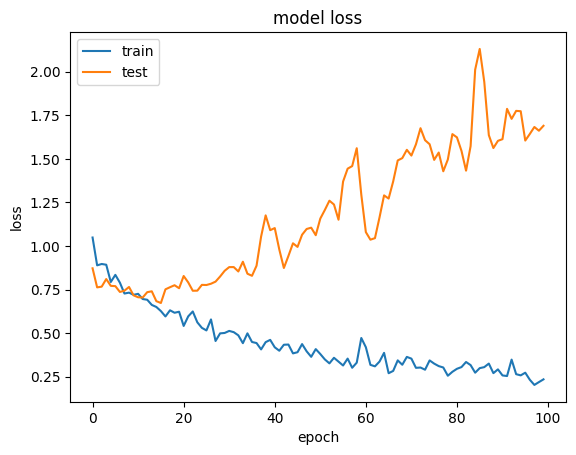

In [261]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


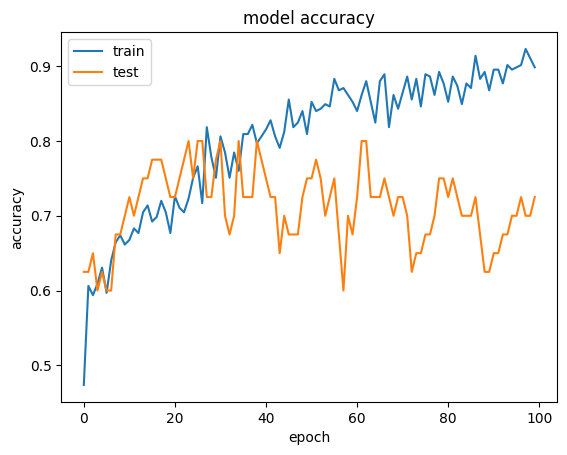

In [262]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [260]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = model.predict(X_train)

# Assuming y_test and predictions are available
predictions_classes = np.argmax(predictions, axis=1)
y_test_classes = np.argmax(y_train, axis=1)

conf_matrix = confusion_matrix(y_test_classes, predictions_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


ValueError: multiclass-multioutput is not supported

In [184]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output labels if not already in binary form
y_test_binarized = label_binarize(y_test_classes, classes=[0, 1, 2])
predictions_binarized = label_binarize(predictions_classes, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binarized.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], predictions_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


ValueError: Multioutput target data is not supported with label binarization

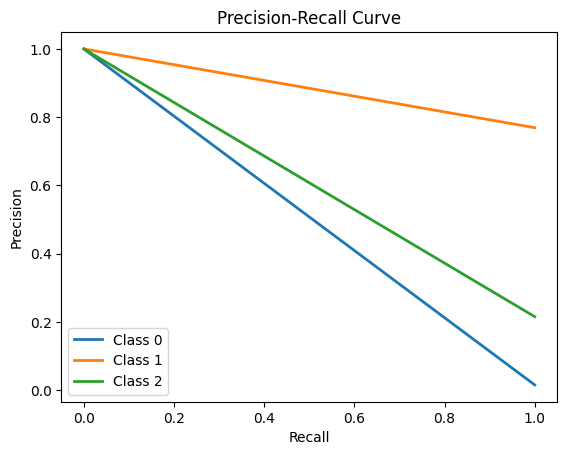

In [185]:
from sklearn.metrics import precision_recall_curve

precision = dict()
recall = dict()
n_classes = y_test_binarized.shape[1]
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], predictions_binarized[:, i])

plt.figure()
for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label='Class {0}'.format(i))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


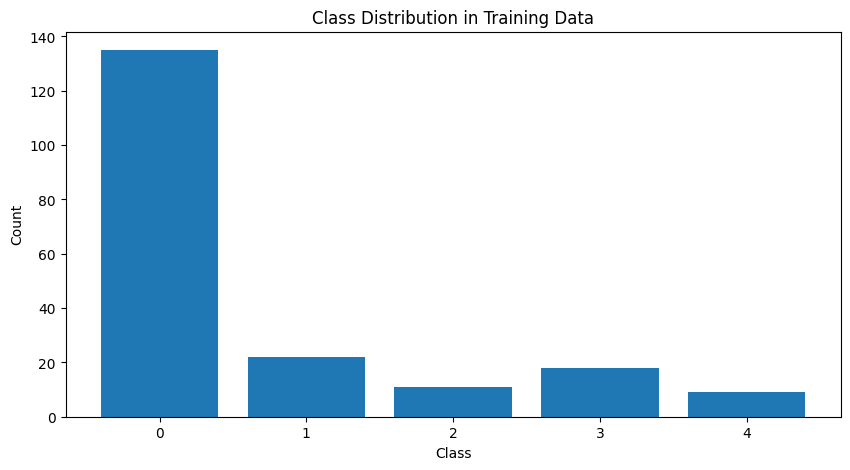

In [186]:
plt.figure(figsize=(10, 5))
y_train_classes = np.argmax(y_train, axis=1)
unique, counts = np.unique(y_train_classes, return_counts=True)
plt.bar(unique, counts, tick_label=unique)
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

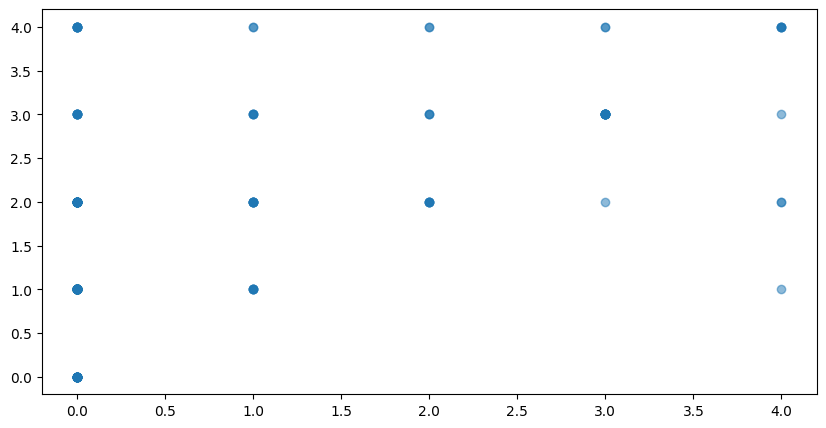

In [187]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test_classes, predictions_classes, alpha=0.5)
plt.plot([min(y_test_classes), max(y_test_classes)], [min(y_test_classes), max(y_test_classes)], 'r')
plt.title('Model Predictions vs. True Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [134]:
for i in predictions.tolist():
    if sum(i) > 1:
        print("yes")
   

In [119]:
X_test

array([[ 1.38103854, -0.41660104,  0.68696758,  0.64825417,  0.77005138,
         0.21664744,  0.        ,  1.09379591,  1.24208962, -1.66259235,
        -1.77549645, -2.0422051 , -1.46725046,  0.06534103,  0.40429496,
        -0.98006444,  0.22761526, -1.07744586,  0.51625479, -0.40515266,
         0.64257546, -0.84265144,  0.30036802,  0.08757118, -1.43173504],
       [ 0.13639887, -0.41660104,  0.68696758,  1.96276956, -0.35422363,
         0.21664744,  0.        ,  0.10802923,  0.03312239,  0.50471553,
         1.12624775, -0.02759737,  1.50800742, -1.52462395, -1.00111132,
         0.        ,  1.50576249,  1.63474544, -1.46725046,  1.9929131 ,
        -2.28917509, -0.84265144,  0.30036802,  1.36611042,  0.3548745 ],
       [ 0.13639887, -0.41660104, -0.4792797 ,  0.64825417,  0.77005138,
         0.21664744,  0.        ,  0.10802923,  0.03312239, -2.74624629,
        -1.77549645,  0.9797065 ,  1.50800742,  0.06534103, -1.00111132,
        -0.98006444,  1.50576249,  1.63474544, -2

In [255]:


loaded_model.predict(X_test[1:2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[[0.02102376, 0.1734688 , 0.03765308],
        [0.05119453, 0.10902289, 0.0520968 ],
        [0.03110506, 0.14130493, 0.05426607],
        [0.02508493, 0.08103496, 0.05030118],
        [0.01647181, 0.0829772 , 0.07299413]]], dtype=float32)

In [258]:
predictions = model.predict(X_test[1:10])
predicted_classes = np.argmax(predictions, axis=2)
print(predicted_classes.shape)  # Should be (samples, 5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
(7, 5)


In [259]:
predicted_classes

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 2, 2],
       [1, 1, 1, 2, 2],
       [1, 1, 1, 2, 2],
       [1, 1, 2, 1, 2],
       [1, 2, 2, 2, 2],
       [1, 1, 1, 2, 2]])

In [253]:
X_test[:1]

array([[ 1.38103854, -0.41660104,  0.68696758,  0.64825417,  0.77005138,
         0.21664744,  0.        ,  1.09379591,  1.24208962, -1.66259235,
        -1.77549645, -2.0422051 , -1.46725046,  0.06534103,  0.40429496,
        -0.98006444,  0.22761526, -1.07744586,  0.51625479, -0.40515266,
         0.64257546, -0.84265144,  0.30036802,  0.08757118, -1.43173504]])